# Exploratory Analysis

In [56]:
# Essential imports and constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sb
from sqlalchemy import create_engine
from bs4 import BeautifulSoup as bs
import requests, time, datetime, re

# if executed locally
TEST = 'Rationale/test.csv'
FORM4_LINK = 'Database/form4_data.csv'
FORM4_LINK_XML = 'Database/form4_data_xml.csv'
FORM4_LINK_HTM = 'Database/form4_data_htm.csv'
FORM4_LINK_TXT = 'Database/form4_data_txt.csv'
FORM4_DETAIL = 'Database/form4_detail.csv' 
FORM4_DETAIL_XML = 'Database/form4_detail_xml.csv'
FORM4_DETAIL_HTM = 'Database/form4_detail_htm.csv'
FORM4_DETAIL_TXT = 'Database/form4_detail_txt.csv'
FORM4_TX = 'Database/form4_tx.csv'
FORM4_TX_XML = 'Database/form4_tx_xml.csv'
FORM4_TX_HTM = 'Database/form4_tx_htm.csv'
FORM4_TX_TXT = 'Database/form4_tx_txt.csv'
META_DJ30 = 'Metadata/ticker_dj30.txt' 
META_SP500 = 'Metadata/ticker_sp500.txt'

In [ ]:
# if executed on Google Colab
FORM4_LINK = '/content/drive/My Drive/URECA/Database/form4_data.csv'
FORM4_LINK_XML = '/content/drive/My Drive/URECA/Database/form4_data_xml.csv'
FORM4_LINK_HTM = '/content/drive/My Drive/URECA/Database/form4_data_htm.csv'
FORM4_LINK_TXT = '/content/drive/My Drive/URECA/Database/form4_data_txt.csv'
FORM4_DETAIL = '/content/drive/My Drive/URECA/Database/form4_detail.csv'
FORM4_DETAIL_XML = '/content/drive/My Drive/URECA/Database/form4_detail_xml.csv'
FORM4_DETAIL_HTM = '/content/drive/My Drive/URECA/Database/form4_detail_htm.csv'
FORM4_DETAIL_TXT = '/content/drive/My Drive/URECA/Database/form4_detail_txt.csv'
FORM4_TX = '/content/drive/My Drive/URECA/Database/form4_tx.csv'
FORM4_TX_XML = '/content/drive/My Drive/URECA/Database/form4_tx_xml.csv'
FORM4_TX_HTM = '/content/drive/My Drive/URECA/Database/form4_tx_htm.csv'
FORM4_TX_TXT = '/content/drive/My Drive/URECA/Database/form4_tx_txt.csv'
META_DJ30 = '/content/drive/My Drive/URECA/Metadata/ticker_dj30.txt' 
META_SP500 = '/content/drive/My Drive/URECA/Metadata/ticker_sp500.txt'
TEST = '/content/drive/My Drive/URECA/Rationale/test.csv'

from google.colab import drive
drive.mount('/content/drive')

In [102]:
# date_parser = lambda x: datetime.datetime.strptime(x, "%Y-%m-%d")
date_parser = lambda x: pd.to_datetime(x, format="%Y-%m-%d")
detail_data = pd.read_csv(FORM4_DETAIL_XML, sep='|', parse_dates = ['Date'], date_parser = date_parser)
tx_data = pd.read_csv(FORM4_TX_XML, sep='|', parse_dates=['date'])
display(detail_data.head())
display(tx_data.head())

,Company,CIK,Date,XML Link,trad_symbol,accession_no,form,reporter_name,reporter_cik,reporter_title,is_director,is_officer,is_beneficial_owner,is_other
0,3M CO,66740,2014-05-01,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,112760214015755,4,Palensky Fred J,1197743,EXEC VP R&D & CHF TECH OFF,0,1,0,0
1,3M CO,66740,2014-05-07,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,112760214016681,4,Thulin Inge G,1263739,"Chairman, President & CEO",1,1,0,0
2,3M CO,66740,2014-05-01,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,112760214015749,4,Palensky Fred J,1197743,EXEC VP R&D & CHF TECH OFF,0,1,0,0
3,3M CO,66740,2014-05-14,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,112760214017542,4,Coffman Vance D,1193998,NaN,1,0,0,0
4,3M CO,66740,2014-05-02,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,112760214016109,4,Gangestad Nicholas C,1515709,VP CORP CNTRLR & CF ACCTG OFC,0,1,0,0


,accession_no,CIK,stock_type,date,code,acquired,shares_exchanged,net_shares_owned,stock_price,direct_ownership
0,112760214015755,66740,Common Stock,2014-04-30,S,False,-5288.0,47963.0,139.1000,True
1,112760214015755,66740,Common Stock,2014-04-30,S,False,-1200.0,46763.0,139.1007,True
2,112760214015755,66740,Common Stock,2014-04-30,S,False,-8642.0,38121.0,139.1100,True
3,112760214015755,66740,Common Stock,2014-04-30,S,False,-300.0,37821.0,139.1107,True
4,112760214015755,66740,Common Stock,2014-04-30,S,False,-500.0,37321.0,139.1120,True


In [103]:
detail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62103 entries, 0 to 62102
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Company              62103 non-null  object        
 1   CIK                  62103 non-null  int64         
 2   Date                 62103 non-null  datetime64[ns]
 3   XML Link             62103 non-null  object        
 4   trad_symbol          62103 non-null  object        
 5   accession_no         62103 non-null  int64         
 6   form                 62103 non-null  int64         
 7   reporter_name        62103 non-null  object        
 8   reporter_cik         62103 non-null  int64         
 9   reporter_title       41377 non-null  object        
 10  is_director          62103 non-null  int64         
 11  is_officer           62103 non-null  int64         
 12  is_beneficial_owner  62103 non-null  int64         
 13  is_other             62103 non-

## Cleaning and Inspecting Data
To ensure that all values are downloaded, the null values are inspected. At times, some values are not scraped, possibly due to errors in Beautiful Soup

In [40]:
detail_data.isnull().sum(axis = 0)

Company                    0
CIK                        0
Date                       0
XML Link                   0
trad_symbol                1
accession_no               0
form                       0
reporter_name              1
reporter_cik               1
reporter_title         20727
is_director                0
is_officer                 0
is_beneficial_owner        0
is_other                   0
dtype: int64

There is one null value for `trad_symbol`, `reporter_name` and `reporter_cik`. We perform a manual investigation by checking the actual data

In [29]:
df_no_title = detail_data.drop(['reporter_title'], axis = 1)
df_no_title[df_no_title.isnull().any(axis=1)]

,Company,CIK,Date,XML Link,trad_symbol,accession_no,form,reporter_name,reporter_cik,is_director,is_officer,is_beneficial_owner,is_other
37178,HONEYWELL INTERNATIONAL INC,773840,2004-02-10,https://www.sec.gov/Archives/edgar/data/773840...,NaN,95011704000580,4,NaN,NaN,0,0,0,0


## Exploring Data

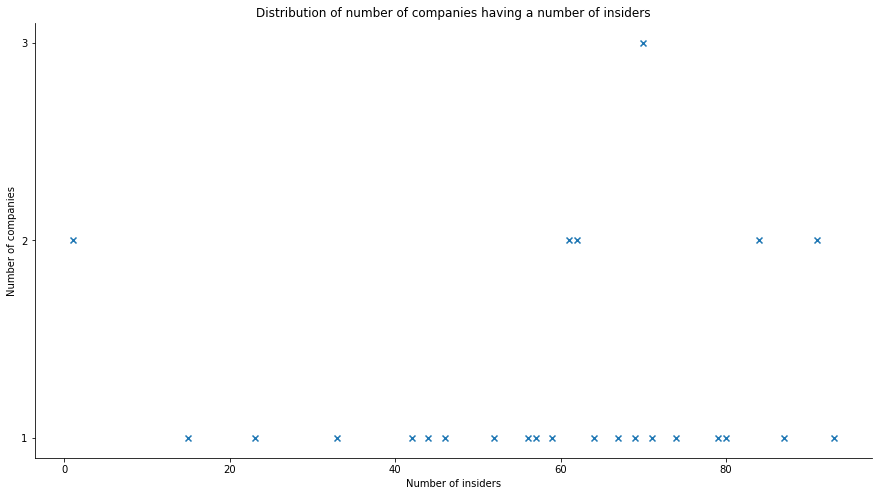

In [158]:
tx_group = detail_data.groupby(['CIK'])['reporter_cik'].nunique()
tx_distribution = tx_group.groupby(tx_group).count()
fig = plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.scatter(tx_distribution.index, tx_distribution.values, marker='x')
ax.yaxis.set_major_locator(MaxNLocator(integer = True))
ax.set_xlabel('Number of insiders')
ax.set_ylabel('Number of companies')
ax.set_title('Distribution of number of companies having a number of insiders')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [142]:
df_tx_by_role = detail_data.merge(tx_data, on = ['accession_no'], how='inner')
df_tx_by_role.set_index('Date', inplace = True)
df_director = df_tx_by_role.loc[df_tx_by_role['is_director'] == 1, :]
df_beneficial = df_tx_by_role.loc[df_tx_by_role['is_beneficial_owner'] == 1, :]
df_officer = df_tx_by_role.loc[df_tx_by_role['is_officer'] == 1, :]
df_other = df_tx_by_role.loc[df_tx_by_role['is_other'] == 1, :]

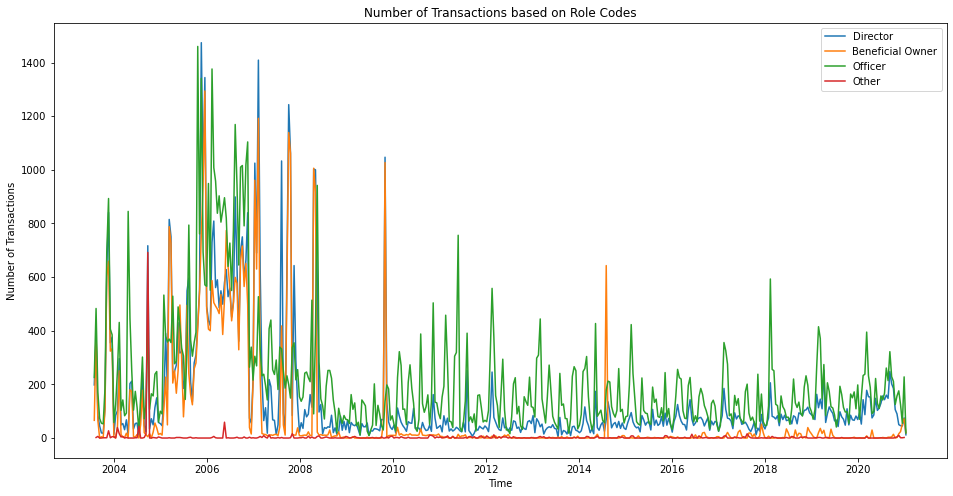

In [161]:
df_director_line = df_director['Company'].groupby(pd.Grouper(freq="2W")).count()
df_beneficial_line = df_beneficial['Company'].groupby(pd.Grouper(freq="2W")).count()
df_officer_line = df_officer['Company'].groupby(pd.Grouper(freq="2W")).count()
df_other_line = df_other['Company'].groupby(pd.Grouper(freq="2W")).count()
f, axes = plt.subplots(figsize = (16, 8))
plt.plot(df_director_line.index, df_director_line.values, label = 'Director')
plt.plot(df_beneficial_line.index, df_beneficial_line.values, label = 'Beneficial Owner')
plt.plot(df_officer_line.index, df_officer_line.values, label = 'Officer')
plt.plot(df_other_line.index, df_other_line.values, label = 'Other')
plt.title("Number of Transactions based on Role Codes")
plt.xlabel("Time")
plt.ylabel("Number of Transactions")
plt.legend()

In [20]:
detail_data.isnull().sum(axis = 0)

Company                    0
CIK                        0
Date                       0
XML Link                   0
trad_symbol                1
accession_no               0
form                       0
reporter_name              1
reporter_cik               1
reporter_title         20727
is_director                0
is_officer                 0
is_beneficial_owner        0
is_other                   0
dtype: int64